In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/Yodak.csv', encoding='cp949')

data.head(5)

,PSEUDO_ID,TEST_CD,TEST_REPRT_DATE,TEST_RESULT
0,1868285,B0010,20090917,Yellow
1,1868285,B0010,20091022,Yellow
2,1868285,B0010,20091127,Yellow
3,1868285,B0010,20100105,Yellow
4,1868285,B0010,20100209,Yellow


In [3]:
len(data)

500000

In [4]:
data.loc[data.TEST_CD == 'B0010'].TEST_RESULT.value_counts()

Yellow        33403
Lt. Yellow      486
yellow          255
Orange          112
Red              63
Dk.Yellow        39
Brown            36
Amber            34
Lt.Orange        33
Other            32
DK.Orange        27
Dk.Red           24
Reddish          23
Dk.Orange        18
DK.Yellow        16
Green             9
Milkly            7
Straw             3
HEMATURIA         3
Dk. Yellow        1
Dk.Brown          1
Dk. Red           1
Negative          1
Name: TEST_RESULT, dtype: int64

# Data Preprocessing

In [5]:
# find nan

data.isna().sum()

PSEUDO_ID          0
TEST_CD            0
TEST_REPRT_DATE    0
TEST_RESULT        0
dtype: int64

In [6]:
# find duplicates

data.duplicated().sum()

3

In [7]:
data[data.duplicated()]

,PSEUDO_ID,TEST_CD,TEST_REPRT_DATE,TEST_RESULT
136608,50819265,백혈구,20130914,22
408200,891166425,잠혈,20180413,0
484173,930047895,잠혈,20190513,5


In [8]:
# drop duplicates

data = data.drop_duplicates()

len(data)

499997

In [9]:
filter_gg = pd.read_csv('../Data/Filter/B0043GG.csv').TEST_RESULT
filter_hh = pd.read_csv('../Data/Filter/B0043HH.csv').TEST_RESULT
filter_ii = pd.read_csv('../Data/Filter/B0043II.csv').TEST_RESULT

In [10]:
data_gg = data.loc[data.TEST_CD == 'B0043GG']
data_hh = data.loc[data.TEST_CD == 'B0043HH']
data_ii = data.loc[data.TEST_CD == 'B0043II']

In [11]:
data_gg = data_gg.loc[data_gg.TEST_RESULT.isin(filter_gg)]
data_hh = data_hh.loc[data_hh.TEST_RESULT.isin(filter_hh)]
data_ii = data_ii.loc[data_ii.TEST_RESULT.isin(filter_ii)]

print(data_gg.shape)
print(data_hh.shape)
print(data_ii.shape)

(24911, 4)
(24913, 4)
(24939, 4)


In [12]:
for ghis in [data_gg, data_hh, data_ii]:
    data_ghi = []
    
    for ghi in ghis.TEST_RESULT:
        data_ghi.append(ghi.split('(')[-1].split('/')[0])
    
    data_ghi = np.array(data_ghi)
    data_ghi = data_ghi.reshape(-1)
    
    ghis.TEST_RESULT = data_ghi

## Selecting columns

In [13]:
data.TEST_CD.value_counts()

비중          34778
B0043GG     34766
B0043HH     34761
B0043II     34753
산도          34660
단백질         34638
잠혈          34629
B0010       34627
백혈구         34623
포도당         34590
케톤체         34527
아질산염        34526
우로빌리노겐      34517
빌리루빈        34515
B0030ROO    12274
B0030RPP     2416
B0030RGG      189
B0030RDD       88
B0030RQQ       78
B0030RFF       40
B0030REE        2
Name: TEST_CD, dtype: int64

In [14]:
# 오줌 색, 단백질, 백혈구, 비중, 빌리루빈, 산도, 아질산염, 우로빌리노겐, 잠혈, 케톤체, 포도당

urine_color = data.loc[data.TEST_CD == 'B0010']

protein = data.loc[data.TEST_CD == '단백질']
leukocyte = data.loc[data.TEST_CD == '백혈구']
sg = data.loc[data.TEST_CD == '비중']
bilirubin = data.loc[data.TEST_CD == '빌리루빈']
acidity = data.loc[data.TEST_CD == '산도']
nitrite = data.loc[data.TEST_CD == '아질산염']
urobilinogen = data.loc[data.TEST_CD == '우로빌리노겐']
occult_blood  = data.loc[data.TEST_CD == '잠혈']
ketone_body = data.loc[data.TEST_CD == '케톤체']
glucose = data.loc[data.TEST_CD == '포도당']

# Making Data

In [15]:
protein.PSEUDO_ID.value_counts()

100130475    170
2088715      150
50819265     143
930011215    125
930147815    122
            ... 
70053215      20
150068385     19
80032675      19
850192935     19
911746785     19
Name: PSEUDO_ID, Length: 966, dtype: int64

In [16]:
urine_color.rename(columns={'TEST_RESULT' : 'Urin_color'}, inplace=True)
data_gg.rename(columns={'TEST_RESULT' : 'B0043GG'}, inplace=True)
data_hh.rename(columns={'TEST_RESULT' : 'B0043HH'}, inplace=True)
data_ii.rename(columns={'TEST_RESULT' : 'B0043II'}, inplace=True)

protein.rename(columns={'TEST_RESULT' : 'Protein'}, inplace=True)
leukocyte.rename(columns={'TEST_RESULT' : 'Leukocyte'}, inplace=True)
sg.rename(columns={'TEST_RESULT' : 'SG'}, inplace=True)
bilirubin.rename(columns={'TEST_RESULT' : 'Bilirubin'}, inplace=True)
acidity.rename(columns={'TEST_RESULT' : 'Acidity'}, inplace=True)
nitrite.rename(columns={'TEST_RESULT' : 'Nitrite'}, inplace=True)
urobilinogen.rename(columns={'TEST_RESULT' : 'Urobilinogen'}, inplace=True)
occult_blood.rename(columns={'TEST_RESULT' : 'Occult_blood'}, inplace=True)
ketone_body.rename(columns={'TEST_RESULT' : 'Ketone_body'}, inplace=True)
glucose.rename(columns={'TEST_RESULT' : 'Glucose'}, inplace=True)

c:\ProgramData\Anaconda3\envs\Yodak\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
urine_color.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
data_gg.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
data_hh.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
data_ii.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)

protein.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
leukocyte.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
sg.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
bilirubin.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
acidity.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
nitrite.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
urobilinogen.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
occult_blood.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
ketone_body.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)
glucose.set_index(['PSEUDO_ID', 'TEST_REPRT_DATE'], inplace=True)

In [18]:
# urine_color = urine_color.reset_index(drop=True).Urin_color
# protein_col = protein.reset_index(drop=True).Protein
# leukocyte_col = leukocyte.reset_index(drop=True).Leukocyte
# sg_col = sg.reset_index(drop=True).SG
# bilirubin_col = bilirubin.reset_index(drop=True).Bilirubin
# acidity_col = acidity.reset_index(drop=True).Acidity
# nitrite_col = nitrite.reset_index(drop=True).Nitrite
# urobilinogen_col = urobilinogen.reset_index(drop=True).Urobilinogen
# occult_blood_col = occult_blood.reset_index(drop=True).Occult_blood
# ketone_body_col = ketone_body.reset_index(drop=True).Ketone_body
# glucose_col = glucose.reset_index(drop=True).Glucose

In [19]:
urine_color = urine_color.Urin_color
data_gg = data_gg['B0043GG']
data_hh = data_hh['B0043HH']
data_ii = data_ii['B0043II']

protein = protein.Protein
leukocyte = leukocyte.Leukocyte
sg = sg.SG
bilirubin = bilirubin.Bilirubin
acidity = acidity.Acidity
nitrite = nitrite.Nitrite
urobilinogen = urobilinogen.Urobilinogen
occult_blood = occult_blood.Occult_blood
ketone_body = ketone_body.Ketone_body
glucose = glucose.Glucose

In [20]:
dataset = pd.merge(urine_color, data_gg, how='outer', left_index=True, right_index=True)

for col in [data_hh, data_ii, protein, leukocyte, sg, bilirubin, acidity,
            nitrite, urobilinogen, occult_blood, ketone_body, glucose]:
    dataset = pd.merge(dataset, col, how='outer', left_index=True, right_index=True)

In [21]:
dataset.isna().sum()

Urin_color          1
B0043GG         11606
B0043HH         11602
B0043II         11545
Protein            76
Leukocyte          76
SG                 30
Bilirubin          76
Acidity            76
Nitrite            76
Urobilinogen       76
Occult_blood       76
Ketone_body        76
Glucose            76
dtype: int64

In [22]:
dataset.dropna(inplace=True)

In [23]:
dataset.isna().sum()

Urin_color      0
B0043GG         0
B0043HH         0
B0043II         0
Protein         0
Leukocyte       0
SG              0
Bilirubin       0
Acidity         0
Nitrite         0
Urobilinogen    0
Occult_blood    0
Ketone_body     0
Glucose         0
dtype: int64

In [24]:
dataset.duplicated().sum()

0

In [25]:
dataset

Urin_color B0043GG  B0043HH B0043II Protein  \
PSEUDO_ID TEST_REPRT_DATE                                               
1868285   20090917            Yellow     9.3    251.5     4.3       1   
          20091022            Yellow     5.1    548.3     9.1       4   
          20091127            Yellow    12.2   1590.0    23.5       6   
          20100105            Yellow    10.8    447.9    27.2       3   
          20100209            Yellow     7.1    745.6    20.1       7   
...                              ...     ...      ...     ...     ...   
930245015 20160226            Yellow  2594.6    359.6    77.9     514   
          20160229            Yellow   274.6    100.3     9.7     160   
          20160302            Yellow   280.6     88.9     5.8     804   
          20160303            Yellow    20.8     13.9     3.7     782   
          20160324            Yellow   106.4  11615.5    32.7     497   

                          Leukocyte     SG Bilirubin Acidity Nitrite  \
PSEUDO_ID TEST_REPRT_DATE                                              
1868285   20090917              119   1.02       0.1       5  103842   
          20091022              106   1.02         0       5  108098   
          20091127              657  1.016       0.1       5   27515   
          20100105              818  1.011       0.3       5  108963   
          20100209              621  1.006       0.4       5  100520   
...                             ...    ...       ...     ...     ...   
930245015 20160226              645  1.008       0.1     7.5   37063   
          20160229               68  1.015       0.2       8   47191   
          20160302               32  1.009       0.3       8   24769   
          20160303               18  1.009       0.2     7.5   82270   
          20160324              917   1.01       0.1       6   37047   

                          Urobilinogen Occult_blood Ketone_body Glucose  
PSEUDO_ID TEST_REPRT_DATE                                                
1868285   20090917                 0.7            3           1      16  
          20091022                 0.7            2           1      65  
          20091127                 0.7           40           3      79  
          20100105                 0.2            0           3       1  
          20100209                 0.7            3           3      67  
...                                ...          ...         ...     ...  
930245015 20160226                 0.8          365           1     112  
          20160229                 0.3          212           0     226  
          20160302                 0.1          217           3     248  
          20160303                 0.7            7           2     166  
          20160324                 0.3          201           0       5  

[74337 rows x 14 columns]

In [26]:
dataset = pd.get_dummies(data=dataset, columns=['Urin_color'])

In [27]:
sg = []

for data_sg in dataset.SG:
    if '=' in data_sg:
        sg.append(float(data_sg.split('=')[-1]))
    # elif '>' in data_sg:
    #     print(data_sg.split('>')[-1])
    # elif '<' in data_sg:
    #     print(data_sg.split('<')[-1])
    else:
        sg.append(float(data_sg))

sg = np.array(sg).reshape(-1)

dataset.SG = sg

In [28]:
dataset.shape

(74337, 30)

In [29]:
dataset.to_csv('../Data/dataset.csv', index=False)

In [30]:
dataset = pd.read_csv('../Data/dataset.csv')

dataset.head(5)

,B0043GG,B0043HH,B0043II,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Urobilinogen,...,Urin_color_Dk.Yellow,Urin_color_Lt. Yellow,Urin_color_Lt.Orange,Urin_color_Orange,Urin_color_Other,Urin_color_Red,Urin_color_Reddish,Urin_color_Straw,Urin_color_Yellow,Urin_color_yellow
0,9.3,251.5,4.3,1,119,1.020,0.1,5.0,103842,0.7,...,0,0,0,0,0,0,0,0,1,0
1,5.1,548.3,9.1,4,106,1.020,0.0,5.0,108098,0.7,...,0,0,0,0,0,0,0,0,1,0
2,12.2,1590.0,23.5,6,657,1.016,0.1,5.0,27515,0.7,...,0,0,0,0,0,0,0,0,1,0
3,10.8,447.9,27.2,3,818,1.011,0.3,5.0,108963,0.2,...,0,0,0,0,0,0,0,0,1,0
4,7.1,745.6,20.1,7,621,1.006,0.4,5.0,100520,0.7,...,0,0,0,0,0,0,0,0,1,0


In [31]:
dataset.corr()

,B0043GG,B0043HH,B0043II,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Urobilinogen,...,Urin_color_Dk.Yellow,Urin_color_Lt. Yellow,Urin_color_Lt.Orange,Urin_color_Orange,Urin_color_Other,Urin_color_Red,Urin_color_Reddish,Urin_color_Straw,Urin_color_Yellow,Urin_color_yellow
B0043GG,1.000000,0.096027,0.088141,0.157121,0.186729,-0.020436,0.061140,-0.026904,-0.036130,0.018176,...,0.004302,-0.007370,0.011704,0.145380,0.052996,0.201211,0.046175,-0.000519,-0.217225,0.002900
B0043HH,0.096027,1.000000,0.227590,0.179694,0.457519,-0.101952,0.128577,0.045459,0.014762,0.368495,...,0.261634,-0.016811,0.017609,0.116367,0.002956,0.036121,0.174558,0.017425,-0.217255,0.068076
B0043II,0.088141,0.227590,1.000000,0.081203,0.163278,-0.028894,0.066436,0.021368,0.085341,0.031692,...,0.023839,0.010418,0.018339,0.043222,0.008658,0.268918,0.096630,0.004148,-0.195977,0.003017
Protein,0.157121,0.179694,0.081203,1.000000,0.298664,-0.095058,0.295930,0.021627,-0.014989,0.024815,...,-0.004068,0.046770,0.033408,0.268583,0.015265,0.062313,0.016501,0.008381,-0.249923,0.099522
Leukocyte,0.186729,0.457519,0.163278,0.298664,1.000000,-0.229373,0.301321,0.072696,0.018149,0.274540,...,0.170164,-0.028801,0.024572,0.312846,0.011260,0.105873,0.070924,0.005248,-0.298273,0.078859
SG,-0.020436,-0.101952,-0.028894,-0.095058,-0.229373,1.000000,-0.136419,0.042683,0.020128,-0.004718,...,-0.001603,0.034575,0.003306,-0.135223,0.000225,0.014396,-0.013073,0.002780,0.048376,-0.023478
Bilirubin,0.061140,0.128577,0.066436,0.295930,0.301321,-0.136419,1.000000,-0.035126,0.082774,0.120701,...,0.062062,0.052905,0.015522,0.169549,0.004244,0.219010,0.020350,0.001919,-0.249013,0.009587
Acidity,-0.026904,0.045459,0.021368,0.021627,0.072696,0.042683,-0.035126,1.000000,0.034194,0.070447,...,0.038091,-0.042755,-0.005461,0.092353,-0.001711,-0.011100,-0.026709,-0.001563,-0.029870,0.028010
Nitrite,-0.036130,0.014762,0.085341,-0.014989,0.018149,0.020128,0.082774,0.034194,1.000000,-0.049850,...,-0.033451,0.028507,-0.010034,-0.050245,-0.002374,0.098163,0.052840,-0.005212,-0.007177,-0.043194
Urobilinogen,0.018176,0.368495,0.031692,0.024815,0.274540,-0.004718,0.120701,0.070447,-0.049850,1.000000,...,0.663746,-0.024695,0.002812,0.031757,-0.001903,-0.006414,0.002326,-0.000573,-0.222366,-0.002787


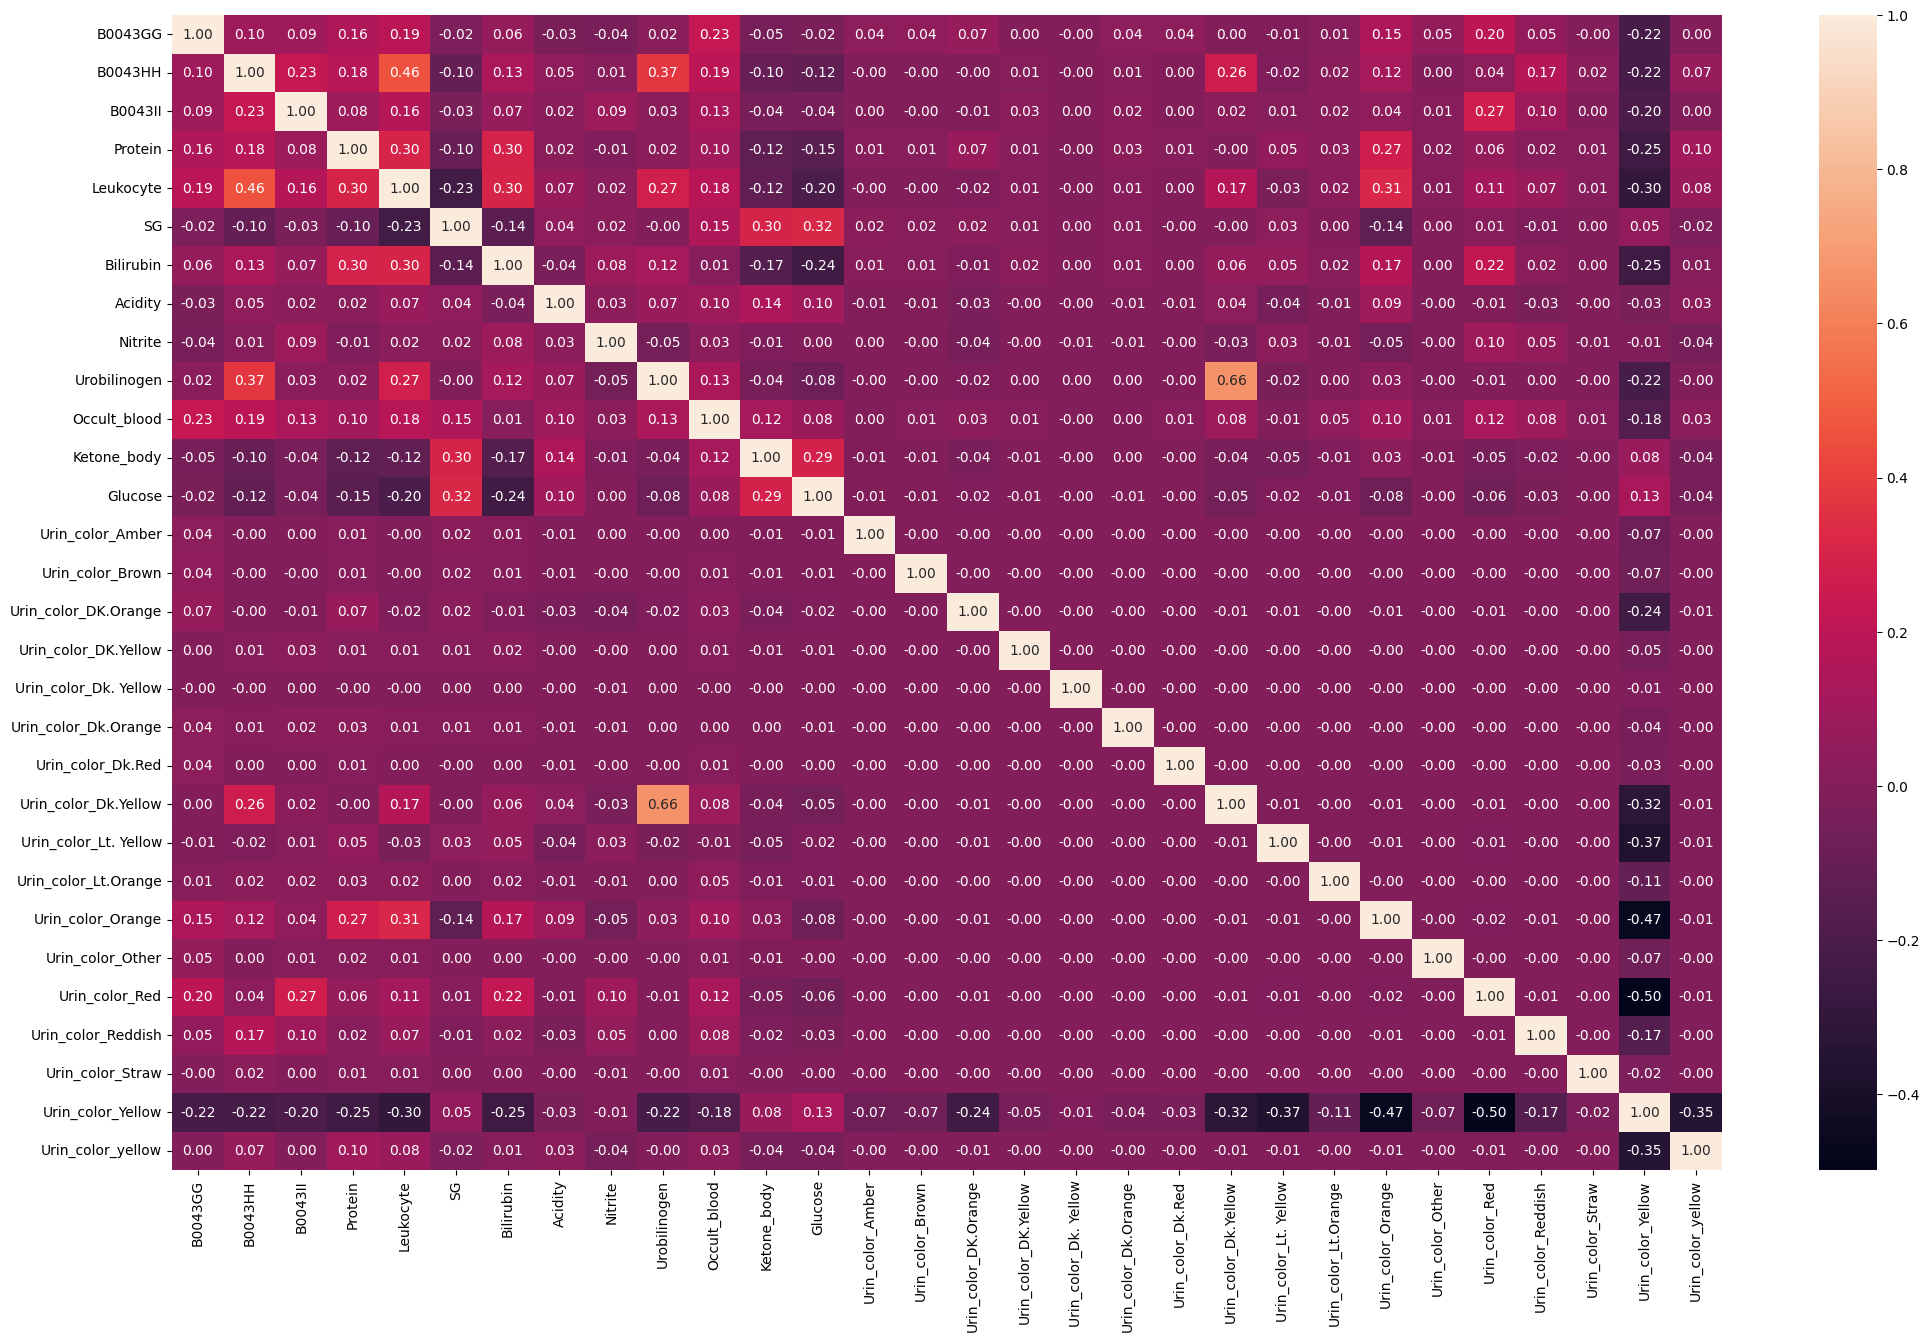

In [37]:
plt.figure(figsize=(25,15))
sns.heatmap(data=dataset.corr(), annot=True, fmt='.2f')
plt.show()

In [130]:
sns.pairplot(dataset.corr())

In [115]:
dataset.corr()['Protein'].abs().sort_values(ascending=False)

Protein                  1.000000
Leukocyte                0.298664
Bilirubin                0.295930
Urin_color_Orange        0.268583
Urin_color_Yellow        0.249923
B0043HH                  0.179694
B0043GG                  0.157121
Glucose                  0.145639
Ketone_body              0.124388
Occult_blood             0.103824
Urin_color_yellow        0.099522
SG                       0.095058
B0043II                  0.081203
Urin_color_DK.Orange     0.073223
Urin_color_Red           0.062313
Urin_color_Lt. Yellow    0.046770
Urin_color_Lt.Orange     0.033408
Urin_color_Dk.Orange     0.027043
Urobilinogen             0.024815
Acidity                  0.021627
Urin_color_Reddish       0.016501
Urin_color_Other         0.015265
Nitrite                  0.014989
Urin_color_DK.Yellow     0.014504
Urin_color_Amber         0.014438
Urin_color_Brown         0.010601
Urin_color_Straw         0.008381
Urin_color_Dk.Red        0.005433
Urin_color_Dk.Yellow     0.004068
Urin_color_Dk.

In [116]:
dataset.corr()['Leukocyte'].abs().sort_values(ascending=False)

Leukocyte                1.000000
B0043HH                  0.457519
Urin_color_Orange        0.312846
Bilirubin                0.301321
Protein                  0.298664
Urin_color_Yellow        0.298273
Urobilinogen             0.274540
SG                       0.229373
Glucose                  0.199949
B0043GG                  0.186729
Occult_blood             0.183746
Urin_color_Dk.Yellow     0.170164
B0043II                  0.163278
Ketone_body              0.122045
Urin_color_Red           0.105873
Urin_color_yellow        0.078859
Acidity                  0.072696
Urin_color_Reddish       0.070924
Urin_color_Lt. Yellow    0.028801
Urin_color_Lt.Orange     0.024572
Nitrite                  0.018149
Urin_color_DK.Orange     0.017099
Urin_color_Dk.Orange     0.013224
Urin_color_DK.Yellow     0.012185
Urin_color_Other         0.011260
Urin_color_Straw         0.005248
Urin_color_Brown         0.003940
Urin_color_Amber         0.001675
Urin_color_Dk.Red        0.001313
Urin_color_Dk.

In [117]:
dataset.corr()['SG'].abs().sort_values(ascending=False)

SG                       1.000000
Glucose                  0.317661
Ketone_body              0.298067
Leukocyte                0.229373
Occult_blood             0.149275
Bilirubin                0.136419
Urin_color_Orange        0.135223
B0043HH                  0.101952
Protein                  0.095058
Urin_color_Yellow        0.048376
Acidity                  0.042683
Urin_color_Lt. Yellow    0.034575
B0043II                  0.028894
Urin_color_yellow        0.023478
B0043GG                  0.020436
Nitrite                  0.020128
Urin_color_Amber         0.019742
Urin_color_DK.Orange     0.019305
Urin_color_Brown         0.015853
Urin_color_Red           0.014396
Urin_color_Reddish       0.013073
Urin_color_Dk.Orange     0.010361
Urin_color_DK.Yellow     0.007634
Urobilinogen             0.004718
Urin_color_Dk.Red        0.004277
Urin_color_Lt.Orange     0.003306
Urin_color_Straw         0.002780
Urin_color_Dk.Yellow     0.001603
Urin_color_Dk. Yellow    0.001042
Urin_color_Oth

In [118]:
dataset.corr()['Bilirubin'].abs().sort_values(ascending=False)

Bilirubin                1.000000
Leukocyte                0.301321
Protein                  0.295930
Urin_color_Yellow        0.249013
Glucose                  0.240392
Urin_color_Red           0.219010
Urin_color_Orange        0.169549
Ketone_body              0.168319
SG                       0.136419
B0043HH                  0.128577
Urobilinogen             0.120701
Nitrite                  0.082774
B0043II                  0.066436
Urin_color_Dk.Yellow     0.062062
B0043GG                  0.061140
Urin_color_Lt. Yellow    0.052905
Acidity                  0.035126
Urin_color_DK.Yellow     0.020426
Urin_color_Reddish       0.020350
Urin_color_Lt.Orange     0.015522
Urin_color_DK.Orange     0.014312
Urin_color_Amber         0.014005
Urin_color_yellow        0.009587
Urin_color_Brown         0.008286
Occult_blood             0.007515
Urin_color_Dk.Orange     0.005631
Urin_color_Dk. Yellow    0.004700
Urin_color_Other         0.004244
Urin_color_Dk.Red        0.003931
Urin_color_Str

In [119]:
dataset.corr()['Acidity'].abs().sort_values(ascending=False)

Acidity                  1.000000
Ketone_body              0.140239
Glucose                  0.100742
Occult_blood             0.096756
Urin_color_Orange        0.092353
Leukocyte                0.072696
Urobilinogen             0.070447
B0043HH                  0.045459
Urin_color_Lt. Yellow    0.042755
SG                       0.042683
Urin_color_Dk.Yellow     0.038091
Bilirubin                0.035126
Nitrite                  0.034194
Urin_color_DK.Orange     0.033709
Urin_color_Yellow        0.029870
Urin_color_yellow        0.028010
B0043GG                  0.026904
Urin_color_Reddish       0.026709
Protein                  0.021627
B0043II                  0.021368
Urin_color_Red           0.011100
Urin_color_Brown         0.009163
Urin_color_Amber         0.008251
Urin_color_Dk.Red        0.005945
Urin_color_Dk.Orange     0.005905
Urin_color_Lt.Orange     0.005461
Urin_color_DK.Yellow     0.004304
Urin_color_Other         0.001711
Urin_color_Straw         0.001563
Urin_color_Dk.

In [120]:
dataset.corr()['Nitrite'].abs().sort_values(ascending=False)

Nitrite                  1.000000
Urin_color_Red           0.098163
B0043II                  0.085341
Bilirubin                0.082774
Urin_color_Reddish       0.052840
Urin_color_Orange        0.050245
Urobilinogen             0.049850
Urin_color_yellow        0.043194
Urin_color_DK.Orange     0.042346
B0043GG                  0.036130
Acidity                  0.034194
Urin_color_Dk.Yellow     0.033451
Urin_color_Lt. Yellow    0.028507
Occult_blood             0.027737
SG                       0.020128
Leukocyte                0.018149
Protein                  0.014989
B0043HH                  0.014762
Ketone_body              0.012623
Urin_color_Lt.Orange     0.010034
Urin_color_Yellow        0.007177
Urin_color_Dk. Yellow    0.006111
Urin_color_Straw         0.005212
Urin_color_Dk.Orange     0.005000
Glucose                  0.004171
Urin_color_Brown         0.002391
Urin_color_Other         0.002374
Urin_color_Dk.Red        0.002137
Urin_color_DK.Yellow     0.000475
Urin_color_Amb

In [121]:
dataset.corr()['Urobilinogen'].abs().sort_values(ascending=False)

Urobilinogen             1.000000
Urin_color_Dk.Yellow     0.663746
B0043HH                  0.368495
Leukocyte                0.274540
Urin_color_Yellow        0.222366
Occult_blood             0.131899
Bilirubin                0.120701
Glucose                  0.076340
Acidity                  0.070447
Nitrite                  0.049850
Ketone_body              0.037152
Urin_color_Orange        0.031757
B0043II                  0.031692
Protein                  0.024815
Urin_color_Lt. Yellow    0.024695
B0043GG                  0.018176
Urin_color_DK.Orange     0.016899
Urin_color_Red           0.006414
SG                       0.004718
Urin_color_DK.Yellow     0.003429
Urin_color_Lt.Orange     0.002812
Urin_color_yellow        0.002787
Urin_color_Brown         0.002541
Urin_color_Reddish       0.002326
Urin_color_Other         0.001903
Urin_color_Dk. Yellow    0.001701
Urin_color_Dk.Orange     0.001155
Urin_color_Dk.Red        0.000720
Urin_color_Amber         0.000648
Urin_color_Str

In [122]:
dataset.corr()['Occult_blood'].abs().sort_values(ascending=False)

Occult_blood             1.000000
B0043GG                  0.227341
B0043HH                  0.193826
Leukocyte                0.183746
Urin_color_Yellow        0.179217
SG                       0.149275
B0043II                  0.133286
Urobilinogen             0.131899
Urin_color_Red           0.123134
Ketone_body              0.118204
Protein                  0.103824
Urin_color_Orange        0.101566
Acidity                  0.096756
Urin_color_Dk.Yellow     0.081907
Urin_color_Reddish       0.081403
Glucose                  0.076694
Urin_color_Lt.Orange     0.045071
Urin_color_yellow        0.028532
Nitrite                  0.027737
Urin_color_DK.Orange     0.026125
Urin_color_Dk.Red        0.014742
Urin_color_Other         0.007839
Bilirubin                0.007515
Urin_color_Lt. Yellow    0.006680
Urin_color_DK.Yellow     0.006448
Urin_color_Brown         0.005380
Urin_color_Straw         0.005165
Urin_color_Dk.Orange     0.004353
Urin_color_Dk. Yellow    0.002204
Urin_color_Amb

In [123]:
dataset.corr()['Ketone_body'].abs().sort_values(ascending=False)

Ketone_body              1.000000
SG                       0.298067
Glucose                  0.286262
Bilirubin                0.168319
Acidity                  0.140239
Protein                  0.124388
Leukocyte                0.122045
Occult_blood             0.118204
B0043HH                  0.098697
Urin_color_Yellow        0.076316
Urin_color_Lt. Yellow    0.046562
Urin_color_Red           0.045988
B0043GG                  0.045945
Urin_color_yellow        0.044169
Urin_color_Dk.Yellow     0.038345
Urobilinogen             0.037152
B0043II                  0.036294
Urin_color_DK.Orange     0.035227
Urin_color_Orange        0.025040
Urin_color_Reddish       0.022312
Urin_color_Lt.Orange     0.014625
Nitrite                  0.012623
Urin_color_Other         0.008965
Urin_color_Amber         0.008579
Urin_color_Brown         0.006064
Urin_color_DK.Yellow     0.006058
Urin_color_Dk.Red        0.004395
Urin_color_Straw         0.002884
Urin_color_Dk. Yellow    0.001916
Urin_color_Dk.

In [124]:
dataset.corr()['Glucose'].abs().sort_values(ascending=False)

Glucose                  1.000000
SG                       0.317661
Ketone_body              0.286262
Bilirubin                0.240392
Leukocyte                0.199949
Protein                  0.145639
Urin_color_Yellow        0.125012
B0043HH                  0.120803
Acidity                  0.100742
Urin_color_Orange        0.078550
Occult_blood             0.076694
Urobilinogen             0.076340
Urin_color_Red           0.062400
Urin_color_Dk.Yellow     0.053695
Urin_color_yellow        0.044257
B0043II                  0.041301
Urin_color_Reddish       0.025791
B0043GG                  0.024758
Urin_color_Lt. Yellow    0.015962
Urin_color_DK.Orange     0.015574
Urin_color_Lt.Orange     0.014906
Urin_color_Brown         0.009365
Urin_color_Amber         0.007816
Urin_color_Dk.Orange     0.006484
Urin_color_DK.Yellow     0.005147
Urin_color_Dk.Red        0.004626
Urin_color_Other         0.004221
Nitrite                  0.004171
Urin_color_Straw         0.003387
Urin_color_Dk.